# Sberbank Kaggle Data - Exploratory Data Analysis (EDA)

In [1]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd, seaborn as sns, numpy as np

In [2]:
%matplotlib inline

In [3]:
train_data = "/mnt/h/Kaggle/Competitions/Russian Bank/data/train.csv/train.csv"
test_data = "/mnt/h/Kaggle/Competitions/Russian Bank/data/test.csv/test.csv"
macro_data = "/mnt/h/Kaggle/Competitions/Russian Bank/data/macro.csv/macro.csv"

In [4]:
train_df = pd.read_csv(train_data, parse_dates=['timestamp'])
test_df = pd.read_csv(test_data, parse_dates=['timestamp'])
macro_df = pd.read_csv(macro_data, parse_dates=['timestamp'])

In [5]:
LABEL = "price_doc"

In [6]:
final_df = pd.merge(train_df, macro_df, on='timestamp')

In [7]:
final_df['timestamp_epoch'] = final_df.apply(lambda row: row['timestamp'].value, axis=1)

In [8]:
final_df['timestamp_month'] = final_df.apply(lambda row: row['timestamp'].month, axis=1)

In [9]:
final_df['timestamp_day'] = final_df.apply(lambda row: row['timestamp'].day, axis=1)

In [10]:
final_df['timestamp_dayofweek'] = final_df.apply(lambda row: row['timestamp'].dayofweek, axis=1)

In [11]:
final_df['timestamp_week'] = final_df.apply(lambda row: row['timestamp'].week, axis=1)

In [12]:
del train_df, test_df, macro_df

# Preview the dataset

There's a lot of feature columns...

In [13]:
final_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,timestamp_epoch,timestamp_month,timestamp_day,timestamp_dayofweek,timestamp_week
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,269768.0,22.37,64.12,23587.0,230310.0,1313798400000000000,8,20,5,33
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,269768.0,22.37,64.12,23587.0,230310.0,1314057600000000000,8,23,1,34
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,269768.0,22.37,64.12,23587.0,230310.0,1314403200000000000,8,27,5,34
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,269768.0,22.37,64.12,23587.0,230310.0,1314835200000000000,9,1,3,35
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,269768.0,22.37,64.12,23587.0,230310.0,1315180800000000000,9,5,0,36


# train.csv and test.csv

- price_doc: sale price (this is the target variable)
- id: transaction id
- timestamp: date of transaction
- full_sq: total area in square meters, including loggias, balconies and other non-residential areas
- life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
- floor: for apartments, floor of the building
- max_floor: number of floors in the building
- material: wall material
- build_year: year built
- num_room: number of living rooms
- kitch_sq: kitchen area
- state: apartment condition
- product_type: owner-occupier purchase or investment
- sub_area: name of the district

##### The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.

- full_all: subarea population
- male_f, female_f: subarea population by gender
- young_*: population younger than working age
- work_*: working-age population
- ekder_*: retirement-age population
- n_m_{all|male|female}: population between n and m years old
- build_count_*: buildings in the subarea by construction type or year
- x_count_500: the number of x within 500m of the property
- x_part_500: the share of x within 500m of the property
- _sqm_: square meters
- cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB
- trc_: shopping malls
- prom_: industrial zones
- green_: green zones
- metro_: subway
- _avto_: distances by car
- mkad_: Moscow Circle Auto Road
- ttk_: Third Transport Ring
- sadovoe_: Garden Ring
- bulvar_ring_: Boulevard Ring
- kremlin_: City center
- zd_vokzaly_: Train station
- oil_chemistry_: Dirty industry
- ts_: Power plant


# macro.csv

##### A set of macroeconomic indicators, one for each date.

- timestamp: Transaction timestamp
- oil_urals: Crude Oil Urals (dollars/bbl)
- gdp_quart: GDP
- gdp_quart_growth: Real GDP growth
- cpi: Inflation - Consumer Price Index Growth
- ppi: Inflation - Producer Price index Growth
- gdp_deflator: Inflation - GDP deflator
- balance_trade: Trade surplus
- balance_trade_growth: Trade balance (as a percentage of previous year)
- usdrub: Ruble/USD exchange rate
- eurrub: Ruble/EUR exchange rate
- brent: London Brent (dollars/bbl)
- net_capital_export: Net import / export of capital
- gdp_annual: GDP at current prices
- gdp_annual_growth: GDP growth (in real terms)
- average_provision_of_build_contract: Provision by orders in Russia (for the developer)
- average_provision_of_build_contract_moscow: Provision by orders in Moscow (for the developer)
- rts: Index RTS / return
- micex: MICEX index / return
- micex_rgbi_tr: MICEX index for government bonds (MICEX RGBI TR) / yield
- micex_cbi_tr: MICEX Index corporate bonds (MICEX CBI TR) / yield
- deposits_value: Volume of household deposits
- deposits_growth: Volume growth of population's deposits
- deposits_rate: Average interest rate on deposits
- mortgage_value: Volume of mortgage loans
- mortgage_growth: Growth of mortgage lending
- mortgage_rate: Weighted average rate of mortgage loans
- grp: GRP of the subject of Russian Federation where Apartment is located
- grp_growth: Growth of gross regional product of the subject of the Russian Federation where Apartment is located
- income_per_cap: Average income per capita 
- real_dispos_income_per_cap_growth: Growth in real disposable income of Population
- salary: Average monthly salary
- salary_growth: Growth of nominal wages
- fixed_basket: Cost of a fixed basket of consumer goods and services for inter-regional comparisons of purchasing power
- retail_trade_turnover: Retail trade turnover
- retail_trade_turnover_per_cap: Retail trade turnover per capita
- retail_trade_turnover_growth: Retail turnover (in comparable prices in% to corresponding period of previous year)
- labor_force: Size of labor force
- unemployment: Unemployment rate
- employment: Employment rate
- invest_fixed_capital_per_cap: Investments in fixed capital per capita
- invest_fixed_assets: Absolute volume of investments in fixed assets
- profitable_enterpr_share: Share of profitable enterprises
- unprofitable_enterpr_share: The share of unprofitable enterprises
- share_own_revenues: The share of own revenues in the total consolidated budget revenues
- overdue_wages_per_cap: Overdue wages per person
- fin_res_per_cap: The financial results of companies per capita
- marriages_per_1000_cap: Number of marriages per 1,000 people
- divorce_rate: The divorce rate / growth rate
- construction_value: Volume of construction work performed (million rubles)
- invest_fixed_assets_phys: The index of physical volume of investment in fixed assets (in comparable prices in% to the - corresponding month of Previous year)
- pop_natural_increase: Rate of natural increase / decrease in Population (1,000 persons)
- pop_migration: Migration increase (decrease) of population
- pop_total_inc: Total population growth
- childbirth: Childbirth
- mortality: Mortality
- housing_fund_sqm: Housing Fund (sqm)
- lodging_sqm_per_cap: Lodging (sqm / pax)
- water_pipes_share: Plumbing availability (pax)
- baths_share: Bath availability (pax)
- sewerage_share: Canalization availability
- gas_share: Gas (mains, liquefied) availability
- hot_water_share: Hot water availability
- electric_stove_share: Electric heating for the floor
- heating_share: Heating availability
- old_house_share: Proportion of old and dilapidated housing, percent
- average_life_exp: Average life expectancy
- infant_mortarity_per_1000_cap: Infant mortality rate (per 1,000 children aged up to one year)
- perinatal_mort_per_1000_cap: Perinatal mortality rate (per 1,000 live births)
- incidence_population: Overall incidence of the total population
- rent_price_4+room_bus: rent price for 4-room apartment, business class
- rent_price_3room_bus: rent price for 3-room apartment, business class
- rent_price_2room_bus: rent price for 2-room apartment, business class
- rent_price_1room_bus: rent price for 1-room apartment, business class
- rent_price_3room_eco: rent price for 3-room apartment, econom class
- rent_price_2room_eco: rent price for 2-room apartment, econom class
- rent_price_1room_eco: rent price for 1-room apartment, econom class
- load_of_teachers_preschool_per_teacher: Load of teachers of preschool educational institutions (number of children per 100 teachers);
- child_on_acc_pre_school: Number of children waiting for the determination to pre-school educational institutions, for capacity of 100
- load_of_teachers_school_per_teacher: Load on teachers in high school (number of pupils in hugh school for 100 teachers)
- students_state_oneshift: Proportion of pupils in high schools with one shift, of the total number of pupils in high schools
- modern_education_share: Share of state (municipal) educational organizations, corresponding to modern requirements of education in the total number of high schools;
- old_education_build_share: The share of state (municipal) educational organizations, buildings are in disrepair and in need of major repairs of the total number.
- provision_doctors: Provision (relative number) of medical doctors in area
- provision_nurse: Provision of nursing staff
- load_on_doctors: The load on doctors (number of visits per physician)
- power_clinics: Capacity of outpatient clinics
- hospital_beds_available_per_cap: Availability of hospital beds per 100 000 persons
- hospital_bed_occupancy_per_year: Average occupancy rate of the hospital beds during a year
- provision_retail_space_sqm: Retail space
- provision_retail_space_modern_sqm: Provision of population with retail space of modern formats, square meter
- retail_trade_turnover_per_cap: Retail trade turnover per capita
- turnover_catering_per_cap: Turnover of catering industry per person
- theaters_viewers_per_1000_cap: Number of theaters viewers per 1000 population
- seats_theather_rfmin_per_100000_cap: Total number of seats in Auditorium of the Ministry of Culture Russian theaters per 100,000 population
- museum_visitis_per_100_cap: Number of visits to museums per 1000 of population
- bandwidth_sports: Capacity of sports facilities
- population_reg_sports_share: Proportion of population regularly doing  sports
- students_reg_sports_share: Proportion of pupils and students regularly doing sports in the total number
- apartment_build: City residential apartment construction
- apartment_fund_sqm: City residential apartment fund 


# Complete description of neighbourhood features

- area_m	Area mun. area, sq.m.
- raion_popul	Number of municipality population. district
- green_zone_part	Proportion of area of ​​greenery in the total area
- indust_part	Share of industrial zones in area of ​​the total area
- children_preschool	Number of pre-school age population
- preschool_quota	Number of seats in pre-school organizations
- preschool_education_centers_raion	Number of pre-school  institutions
- children_school	Population of school-age children
- school_quota	Number of high school seats in area
- school_education_centers_raion	Number of  high school institutions
- school_education_centers_top_20_raion	Number of high schools of the top 20 best schools in Moscow
- hospital_beds_raion	Number of hospital beds for the district
- healthcare_centers_raion	Number of healthcare centers in district
- university_top_20_raion	Number of higher education institutions in the top ten ranking of the Federal rank
- sport_objects_raion	Number of higher education institutions
- additional_education_raion	Number of additional education organizations
- culture_objects_top_25	Presence of the key objects of cultural heritage (significant objects for the level of the RF constituent entities, city)
- culture_objects_top_25_raion	Number of  objects of cultural heritage
- shopping_centers_raion	Number of malls and shopping centres in district
- office_raion	Number of malls and shopping centres in district
- thermal_power_plant_raion	Presence of thermal power station in district
- incineration_raion	Presence of incinerators
- oil_chemistry_raion	Presence of dirty industries
- radiation_raion	Presence of radioactive waste disposal
- railroad_terminal_raion	Presence of the railroad terminal in district
- big_market_raion	Presence of large grocery / wholesale markets
- nuclear_reactor_raion	Presence of existing nuclear reactors
- detention_facility_raion	Presence of detention centers, prisons
- full_all	Total number of  population in the municipality
- male_f	Male population
- female_f	Female population
- young_all	Population younger than working age
- young_male	Male population younger than working age 
- young_female	Feale population younger than working age 
- work_all	Working-age population
- work_male	Male working-age population
- work_female	Female working-age population
- ekder_all	Population older than  working age
- ekder_male	Male population older than  working age
- ekder_female	Female population older than  working age
- 0_6_all	Population aged 0-6
- 0_6_male	Male population aged 0-7
- 0_6_female	Female population aged 0-8
- 7_14_all	Population aged  7-14
- 7_14_male	Male population aged 7-14
- 7_14_female	Female population aged 7-14
- 0_17_all	Population aged 0-17
- 0_17_male	Male population aged 0-17
- 0_17_female	Female population aged 0-17
- 16_29_all	Population aged 16-19
- 16_29_male	Male population aged 16-19
- 16_29_female	Female population aged 16-19
- 0_13_all	Population aged 0-13
- 0_13_male	Male population aged 0-13
- 0_13_female	Female population aged 0-13
- raion_build_count_with_material_info	Number of building with material info in district
- build_count_block	Share of block buildings
- build_count_wood	Share of wood buildings
- build_count_frame	Share of frame buildings
- build_count_brick	Share of brick buildings
- build_count_monolith	Share of monolith buildings
- build_count_panel	Share of panel buildings
- build_count_foam	Share of foam buildings
- build_count_slag	Share of slag buildings
- build_count_mix	Share of mixed buildings
- raion_build_count_with_builddate_info	Number of building with build year info in district
- build_count_before_1920	Share of before_1920 buildings
- build_count_1921-1945	Share of 1921-1945 buildings
- build_count_1946-1970	Share of 1946-1970 buildings
- build_count_1971-1995	Share of 1971-1995 buildings
- build_count_after_1995	Share of after_1995 buildings
- 7_14_male	Male population aged 7-14
- 7_14_female	Female population aged 7-14
- 0_17_all	Population aged 0-17
- 0_17_male	Male population aged 0-17
- 0_17_female	Female population aged 0-17
- 16_29_all	Population aged 16-19
- 16_29_male	Male population aged 16-19
- 16_29_female	Female population aged 16-19
- 0_13_all	Population aged 0-13
- 0_13_male	Male population aged 0-13
- 0_13_female	Female population aged 0-13
- metro_min_avto	Time to subway by car, min.
- metro_km_avto	Distance to subway by car, km
- metro_min_walk	Time to metro by foot
- metro_km_walk	Distance to the metro, km
- kindergarten_km	Distance to kindergarten
- school_km	Distance to high school 
- park_km	Distance to park
- green_zone_km	Distance to green zone
- industrial_zone_km	Distance to industrial zone
- water_treatment_km	Distance to water treatment
- cemetery_km	Distance to the cemetery
- incineration_km	Distance to the incineration
- railroad_station_walk_km	Distance to the railroad station (walk)
- railroad_station_walk_min	Time to the railroad station (walk)
- ID_railroad_station_walk	Nearest railroad station id (walk)
- railroad_station_avto_km	Distance to the railroad station (avto)
- railroad_station_avto_min	Time to the railroad station (avto)
- ID_railroad_station_avto	Nearest railroad station id (avto)
- public_transport_station_km	Distance to the public transport station (walk)
- public_transport_station_min_walk	Time to the public transport station (walk)
- water_km	Distance to the water reservoir / river
- water_1line	First line to the river (150 m)
- mkad_km	Distance to MKAD (Moscow Circle Auto Road)
- ttk_km	Distance to the TTC (Third Transport Ring)
- sadovoe_km	Distance to the Garden Ring
- bulvar_ring_km	The distance to the Boulevard Ring
- kremlin_km	Distance to the city center (Kremlin)
- big_road1_km	Distance to Nearest major road
- ID_big_road1	Nearest big road id
- big_road1_1line	First line to the road (100 m for highwys, 250 m to MKAD)
- big_road2_km	The distance to next distant major road
- ID_big_road2	2nd nearest big road id
- railroad_km	Distance to the railway / Moscow Central Ring / open areas Underground
- railroad_1line	First line to the railway (100 m)
- zd_vokzaly_avto_km	Distance to train station
- ID_railroad_terminal	Nearest railroad terminal id
- bus_terminal_avto_km	Distance to bus terminal (avto)
- ID_bus_terminal	Nearest bus terminal id
- oil_chemistry_km	Distance to dirty industries
- nuclear_reactor_km	Distance to nuclear reactor
- radiation_km	Distance to burial of radioactive waste
- power_transmission_line_km	Distance to power transmission line
- thermal_power_plant_km	Distance to thermal power plant
- ts_km	Distance to power station
- big_market_km	Distance to grocery / wholesale markets
- market_shop_km	Distance to markets and department stores
- fitness_km	Distance to fitness
- swim_pool_km	Distance to swimming pool
- ice_rink_km	Distance to ice palace
- stadium_km	Distance to stadium
- basketball_km	Distance to the basketball courts
- hospice_morgue_km	Distance to hospice/morgue
- detention_facility_km	Distance to detention facility
- public_healthcare_km	Distance to public healthcare
- university_km	Distance to universities
- workplaces_km	Distance to workplaces
- shopping_centers_km	Distance to shopping centers
- office_km	Distance to business centers/ offices
- additional_education_km	Distance to additional education
- preschool_km	Distance to preschool education organizations
- big_church_km	Distance to large church
- church_synagogue_km	Distance to Christian chirches and Synagogues
- mosque_km	Distance to mosques
- theater_km	Distance to theater
- museum_km	Distance to museums
- exhibition_km	Distance to exhibition
- catering_km	Distance to catering
- ecology	Ecological zone where the house is located
- green_part_500	The share of green zones in 500 meters zone
- prom_part_500	The share of industrial zones in 500 meters zone
- office_count_500	The number of office space in 500 meters zone
- office_sqm_500	The square of office space in 500 meters zone
- trc_count_500	The number of shopping malls in 500 meters zone
- trc_sqm_500	The square of shopping malls in 500 meters zone
- cafe_count_500	The number of cafes or restaurants in 500 meters zone
- cafe_sum_500_min_price_avg	Cafes and restaurant min average bill in 500 meters zone
- cafe_sum_500_max_price_avg	Cafes and restaurant max average bill in 500 meters zone
- cafe_avg_price_500	Cafes and restaurant average bill in 500 meters zone
- cafe_count_500_na_price	Cafes and restaurant bill N/A in 500 meters zone
- cafe_count_500_price_500	Cafes and restaurant bill, average under 500 in 500 meters zone
- cafe_count_500_price_1000	Cafes and restaurant bill, average  500-1000 in 500 meters zone
- cafe_count_500_price_1500	Cafes and restaurant bill, average  1000-1500 in 500 meters zone
- cafe_count_500_price_2500	Cafes and restaurant bill, average  1500-2500 in 500 meters zone
- cafe_count_500_price_4000	Cafes and restaurant bill, average  2500-4000 in 500 meters zone
- cafe_count_500_price_high	Cafes and restaurant bill, average  over 4000 in 500 meters zone
- big_church_count_500	The number of big churchs in 500 meters zone
- church_count_500	The number of churchs in 500 meters zone
- mosque_count_500	The number of mosques in 500 meters zone
- leisure_count_500	The number of leisure facilities in 500 meters zone
- sport_count_500	The number of sport facilities in 500 meters zone
- market_count_500	The number of markets in 500 meters zone
- green_part_1000	The share of green zones in 1000 meters zone
- prom_part_1000	The share of industrial zones in 1000 meters zone
- office_count_1000	The number of office space in 1000 meters zone
- office_sqm_1000	The square of office space in 1000 meters zone
- trc_count_1000	The number of shopping malls in 1000 meters zone
- trc_sqm_1000	The square of shopping malls in 1000 meters zone
- cafe_count_1000	The number of cafes or restaurants in 1000 meters zone
- cafe_sum_1000_min_price_avg	Cafes and restaurant min average bill in 1000 meters zone
- cafe_sum_1000_max_price_avg	Cafes and restaurant max average bill in 1000 meters zone
- cafe_avg_price_1000	Cafes and restaurant average bill in 1000 meters zone
- cafe_count_1000_na_price	Cafes and restaurant bill N/A in 1000 meters zone
- cafe_count_1000_price_500	Cafes and restaurant bill, average under 500 in 1000 meters zone
- cafe_count_1000_price_1000	Cafes and restaurant bill, average  500-1000 in 1000 meters zone
- cafe_count_1000_price_1500	Cafes and restaurant bill, average  1000-1500 in 1000 meters zone
- cafe_count_1000_price_2500	Cafes and restaurant bill, average  1500-2500 in 1000 meters zone
- cafe_count_1000_price_4000	Cafes and restaurant bill, average  2500-4000 in 1000 meters zone
- cafe_count_1000_price_high	Cafes and restaurant bill, average  over 4000 in 1000 meters zone
- big_church_count_1000	The number of big churchs in 1000 meters zone
- church_count_1000	The number of churchs in 1000 meters zone
- mosque_count_1000	The number of mosques in 1000 meters zone
- leisure_count_1000	The number of leisure facilities in 1000 meters zone
- sport_count_1000	The number of sport facilities in 1000 meters zone
- market_count_1000	The number of markets in 1000 meters zone
- green_part_1500	The share of green zones in 1500 meters zone
- prom_part_1500	The share of industrial zones in 1500 meters zone
- office_count_1500	The number of office space in 1500 meters zone
- office_sqm_1500	The square of office space in 1500 meters zone
- trc_count_1500	The number of shopping malls in 1500 meters zone
- trc_sqm_1500	The square of shopping malls in 1500 meters zone
- cafe_count_1500	The number of cafes or restaurants in 1500 meters zone
- cafe_sum_1500_min_price_avg	Cafes and restaurant min average bill in 1500 meters zone
- cafe_sum_1500_max_price_avg	Cafes and restaurant max average bill in 1500 meters zone
- cafe_avg_price_1500	Cafes and restaurant average bill in 1500 meters zone
- cafe_count_1500_na_price	Cafes and restaurant bill N/A in 1500 meters zone
- cafe_count_1500_price_500	Cafes and restaurant bill, average under 500 in 1500 meters zone
- cafe_count_1500_price_1000	Cafes and restaurant bill, average  500-1000 in 1500 meters zone
- cafe_count_1500_price_1500	Cafes and restaurant bill, average  1000-1500 in 1500 meters zone
- cafe_count_1500_price_2500	Cafes and restaurant bill, average  1500-2500 in 1500 meters zone
- cafe_count_1500_price_4000	Cafes and restaurant bill, average  2500-4000 in 1500 meters zone
- cafe_count_1500_price_high	Cafes and restaurant bill, average  over 4000 in 1500 meters zone
- big_church_count_1500	The number of big churchs in 1500 meters zone
- church_count_1500	The number of churchs in 1500 meters zone
- mosque_count_1500	The number of mosques in 1500 meters zone
- leisure_count_1500	The number of leisure facilities in 1500 meters zone
- sport_count_1500	The number of sport facilities in 1500 meters zone
- market_count_1500	The number of markets in 1500 meters zone
- green_part_2000	The share of green zones in 2000 meters zone
- prom_part_2000	The share of industrial zones in 2000 meters zone
- office_count_2000	The number of office space in 2000 meters zone
- office_sqm_2000	The square of office space in 2000 meters zone
- trc_count_2000	The number of shopping malls in 2000 meters zone
- trc_sqm_2000	The square of shopping malls in 2000 meters zone
- cafe_count_2000	The number of cafes or restaurants in 1500 meters zone
- cafe_sum_2000_min_price_avg	Cafes and restaurant min average bill in 2000 meters zone
- cafe_sum_2000_max_price_avg	Cafes and restaurant max average bill in 2000 meters zone
- cafe_avg_price_2000	Cafes and restaurant average bill in 2000 meters zone
- cafe_count_2000_na_price	Cafes and restaurant bill N/A in 2000 meters zone
- cafe_count_2000_price_500	Cafes and restaurant bill, average under 500 in 2000 meters zone
- cafe_count_2000_price_1000	Cafes and restaurant bill, average  500-1000 in 2000 meters zone
- cafe_count_2000_price_1500	Cafes and restaurant bill, average  1000-1500 in 2000 meters zone
- cafe_count_2000_price_2500	Cafes and restaurant bill, average  1500-2500 in 2000 meters zone
- cafe_count_2000_price_4000	Cafes and restaurant bill, average  2500-4000 in 2000 meters zone
- cafe_count_2000_price_high	Cafes and restaurant bill, average  over 4000 in 2000 meters zone
- big_church_count_2000	The number of big churchs in 2000 meters zone
- church_count_2000	The number of churchs in 2000 meters zone
- mosque_count_2000	The number of mosques in 2000 meters zone
- leisure_count_2000	The number of leisure facilities in 2000 meters zone
- sport_count_2000	The number of sport facilities in 2000 meters zone
- market_count_2000	The number of markets in 2000 meters zone
- green_part_3000	The share of green zones in 3000 meters zone
- prom_part_3000	The share of industrial zones in 3000 meters zone
- office_count_3000	The number of office space in 3000 meters zone
- office_sqm_3000	The square of office space in 3000 meters zone
- trc_count_3000	The number of shopping malls in 3000 meters zone
- trc_sqm_3000	The square of shopping malls in 3000 meters zone
- cafe_count_3000	The number of cafes or restaurants in 1500 meters zone
- cafe_sum_3000_min_price_avg	Cafes and restaurant min average bill in 3000 meters zone
- cafe_sum_3000_max_price_avg	Cafes and restaurant max average bill in 3000 meters zone
- cafe_avg_price_3000	Cafes and restaurant average bill in 3000 meters zone
- cafe_count_3000_na_price	Cafes and restaurant bill N/A in 3000 meters zone
- cafe_count_3000_price_500	Cafes and restaurant bill, average under 500 in 3000 meters zone
- cafe_count_3000_price_1000	Cafes and restaurant bill, average  500-1000 in 3000 meters zone
- cafe_count_3000_price_1500	Cafes and restaurant bill, average  1000-1500 in 3000 meters zone
- cafe_count_3000_price_2500	Cafes and restaurant bill, average  1500-2500 in 3000 meters zone
- cafe_count_3000_price_4000	Cafes and restaurant bill, average  2500-4000 in 3000 meters zone
- cafe_count_3000_price_high	Cafes and restaurant bill, average  over 4000 in 3000 meters zone
- big_church_count_3000	The number of big churchs in 3000 meters zone
- church_count_3000	The number of churchs in 3000 meters zone
- mosque_count_3000	The number of mosques in 3000 meters zone
- leisure_count_3000	The number of leisure facilities in 3000 meters zone
- sport_count_3000	The number of sport facilities in 3000 meters zone
- market_count_3000	The number of markets in 3000 meters zone
- green_part_5000	The share of green zones in 5000 meters zone
- prom_part_5000	The share of industrial zones in 5000 meters zone
- office_count_5000	The number of office space in 5000 meters zone
- office_sqm_5000	The square of office space in 5000 meters zone
- trc_count_5000	The number of shopping malls in 5000 meters zone
- trc_sqm_5000	The square of shopping malls in 5000 meters zone
- cafe_count_5000	The number of cafes or restaurants in 1500 meters zone
- cafe_sum_5000_min_price_avg	Cafes and restaurant min average bill in 5000 meters zone
- cafe_sum_5000_max_price_avg	Cafes and restaurant max average bill in 5000 meters zone
- cafe_avg_price_5000	Cafes and restaurant average bill in 5000 meters zone
- cafe_count_5000_na_price	Cafes and restaurant bill N/A in 5000 meters zone
- cafe_count_5000_price_500	Cafes and restaurant bill, average under 500 in 5000 meters zone
- cafe_count_5000_price_1000	Cafes and restaurant bill, average  500-1000 in 5000 meters zone
- cafe_count_5000_price_1500	Cafes and restaurant bill, average  1000-1500 in 5000 meters zone
- cafe_count_5000_price_2500	Cafes and restaurant bill, average  1500-2500 in 5000 meters zone
- cafe_count_5000_price_4000	Cafes and restaurant bill, average  2500-4000 in 5000 meters zone
- cafe_count_5000_price_high	Cafes and restaurant bill, average  over 4000 in 5000 meters zone
- big_church_count_5000	The number of big churchs in 5000 meters zone
- church_count_5000	The number of churchs in 5000 meters zone
- mosque_count_5000	The number of mosques in 5000 meters zone
- leisure_count_5000	The number of leisure facilities in 5000 meters zone
- sport_count_5000	The number of sport facilities in 5000 meters zone
- market_count_5000	The number of markets in 5000 meters zone

# Preliminary feature analysis
These features are included with the train.csv and test.csv files themselves

## Correlation matrix

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


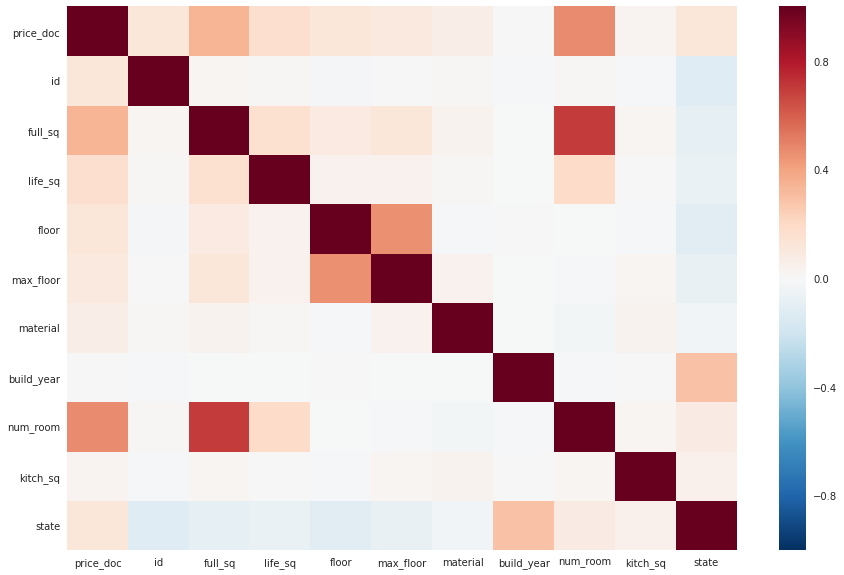

In [14]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(final_df[['price_doc', 'id', 'timestamp', 'full_sq', 'life_sq', 'floor', 
                      'max_floor', 'material', 'build_year', 'num_room','kitch_sq',
                      'state', 'product_type', 'sub_area']].corr(), ax=ax)

- full_sq, life_sq, and num_room are the most correlated features with price.
- Also full_sq and life_sq are <b><i>highly</i></b> correlated with num_rooms. No surprise!

## Price distribution

In [15]:
final_df[LABEL].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

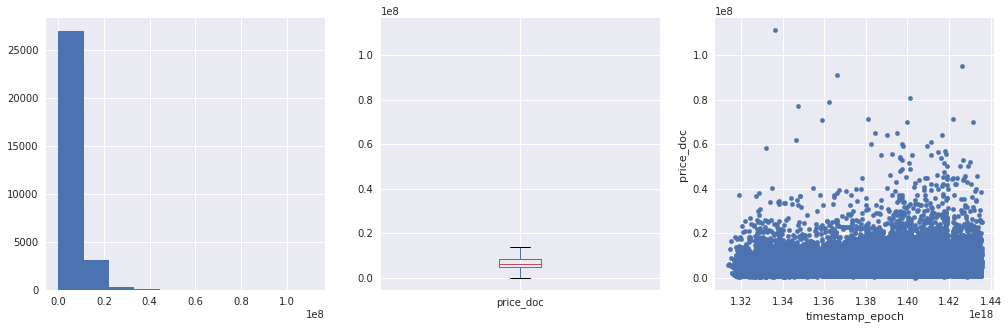

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
final_df[LABEL].hist(ax=axes[0])
final_df[LABEL].plot.box(ax=axes[1])
final_df.plot.scatter(x='timestamp_epoch', y=LABEL, ax=axes[2])

- The price distribution is skewed, so there must be some outliers

## Price relation graphs

### Price trends per year

In [17]:
price_x_time_df = pd.DataFrame({LABEL: final_df[LABEL].values},
              index=pd.DatetimeIndex(final_df['timestamp'].values))

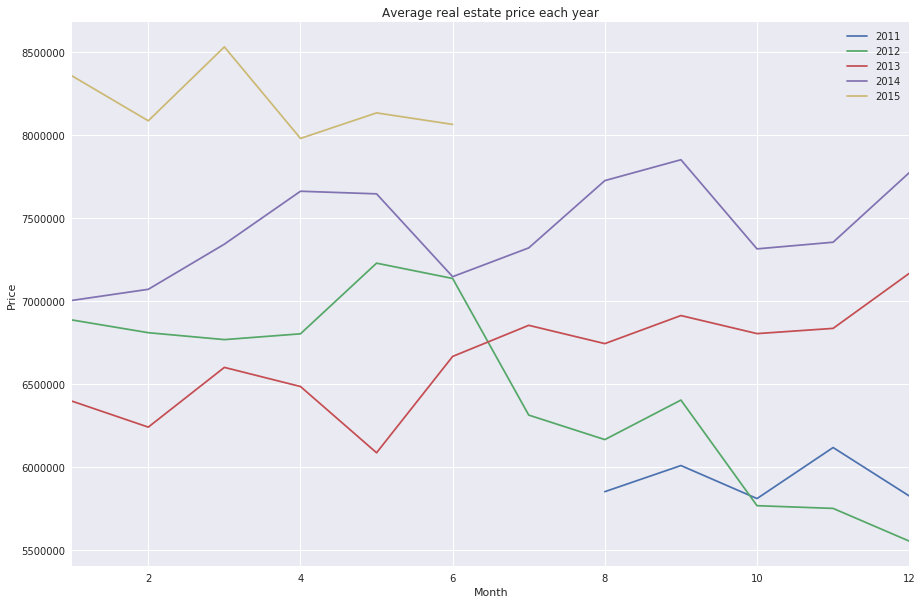

In [18]:
pt_pv = pd.pivot_table(price_x_time_df, index=price_x_time_df.index.month, columns=price_x_time_df.index.year,
                    values=LABEL, aggfunc='mean')
pt_pv.plot(title="Average real estate price each year", figsize=(15, 10), legend=True,).set(xlabel='Month', ylabel='Price')

- In the years 2012, 2011, and 2015, the price seems to fall as we near the year's end.
- For the years, 2013 and 2014, the average price seems to increase as we approach the end of the year.

### Price trends per month

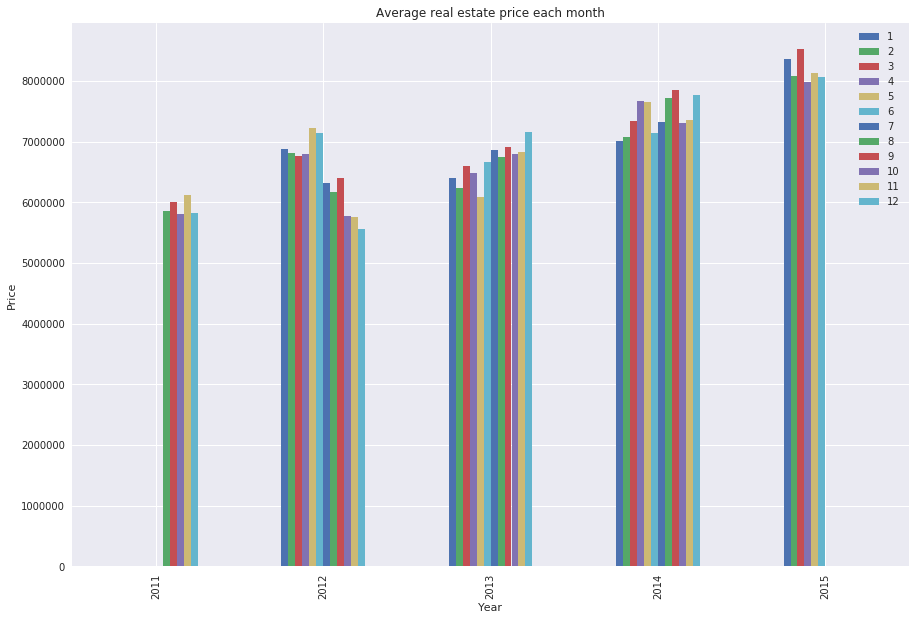

In [19]:
pt_pv = pd.pivot_table(price_x_time_df, index=price_x_time_df.index.year, columns=price_x_time_df.index.month,
                    values=LABEL, aggfunc='mean')
pt_pv.plot(kind='bar', title="Average real estate price each month", figsize=(15, 10), legend=True, ).set(xlabel='Year', ylabel='Price')

- months near the end tend to have higher prices in recent years

### Price trends vs. full_sq

#### Analysis: full_sq

In [20]:
final_df[['full_sq']].describe()

,full_sq
count,30471.000000
mean,54.214269
std,38.031487
min,0.000000
25%,38.000000
50%,49.000000
75%,63.000000
max,5326.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49de3913d0>]], dtype=object)

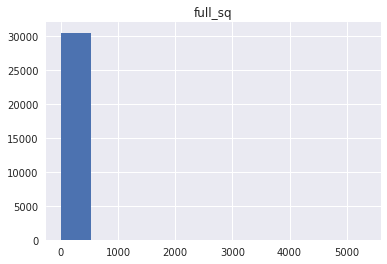

In [21]:
final_df[['full_sq']].hist()

- Distribution of full_sq seems skewed; makes sense since most of the full_sq values for most houses would probably be moderate and within the typical range (excluding bungalows, etc.) 

#### Correlation: full_sq vs. price

In [22]:
print 'Correlation: ', final_df[['full_sq']].corrwith(final_df[LABEL]).values[0]

Correlation:  0.341840459754


In [23]:
full_sq_vs_price_df = final_df[['full_sq', LABEL]]
full_sq_vs_price_df.head()

,full_sq,price_doc
0,43,5850000
1,34,6000000
2,43,5700000
3,89,13100000
4,77,16331452


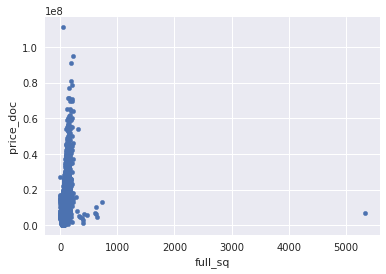

In [24]:
full_sq_vs_price_df.plot(kind='scatter', x = 'full_sq', y = LABEL)

- The price seems to increase as full_sq increases (ignoring the outlier), which makes perfect sense

### Price trends vs. life_sq

#### Analysis: life_sq

In [25]:
final_df[['life_sq']].describe()

,life_sq
count,24088.000000
mean,34.403271
std,52.285733
min,0.000000
25%,20.000000
50%,30.000000
75%,43.000000
max,7478.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49ddee0ed0>]], dtype=object)

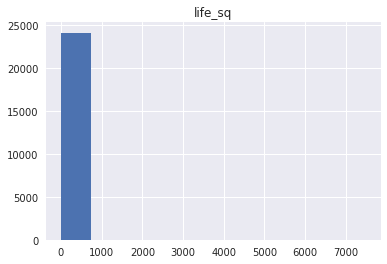

In [26]:
final_df[['life_sq']].hist()

- Distribution of life_sq seems skewed; makes sense since most of the life_sq valuea for most houses would probably be moderate and within the typical range (excluding bungalows, etc.) 

#### Correlation: life_sq vs. price

In [27]:
print 'Correlation: ', final_df[['life_sq']].corrwith(final_df[LABEL]).values[0]

Correlation:  0.165605969193


In [28]:
life_sq_vs_price_df = final_df[['life_sq', LABEL]]
life_sq_vs_price_df.head()

,life_sq,price_doc
0,27.0,5850000
1,19.0,6000000
2,29.0,5700000
3,50.0,13100000
4,77.0,16331452


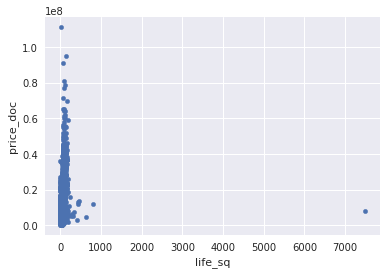

In [29]:
life_sq_vs_price_df.plot(kind='scatter', x = 'life_sq', y = LABEL)

- The price seems to increase as life_sq increases (ignoring the outlier), which makes perfect sense

### Price trends vs. floor (only applies to apartments)

#### Analysis: floor

In [30]:
final_df[['floor']].describe()

,floor
count,30304.000000
mean,7.670803
std,5.319989
min,0.000000
25%,3.000000
50%,6.500000
75%,11.000000
max,77.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49de032e50>]], dtype=object)

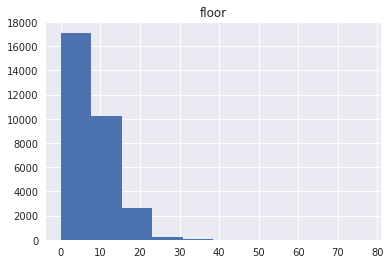

In [31]:
final_df[['floor']].hist()

- Distribution of floor seems skewed; makes sense since most of the possible floors in an apartment would range from 0 to 40.

#### Correlation: floor vs. price

In [32]:
print 'Correlation: ', final_df[['floor']].corrwith(final_df[LABEL]).values[0]

Correlation:  0.117447207668


In [33]:
floor_vs_price_df = final_df[['floor', LABEL]]
floor_vs_price_df.head()

,floor,price_doc
0,4.0,5850000
1,3.0,6000000
2,2.0,5700000
3,9.0,13100000
4,4.0,16331452


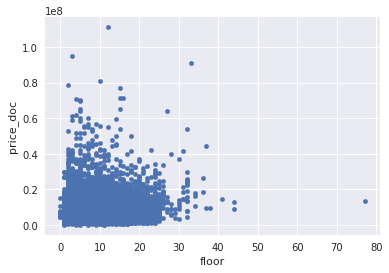

In [37]:
floor_vs_price_df.plot(kind='scatter', x = 'floor', y = LABEL)

- The price seems to decrease as floor increases.
- This means that houses at higher floors in apartments typically have lower prices than the houses at lower floors.